## Plotting Goals: Nice Maps
##### load modules:

In [11]:
from itertools import product

import numpy as np
import xarray as xr

import matplotlib.gridspec as gridspec
import pop_tools
import xpersist as xp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean
import matplotlib.colors as colors
from matplotlib import style
import cartopy.feature as cfeature

import util

### Import Epoch Data

In [6]:
ds_djf_epoch = xr.open_zarr('data/cesm-le-fields-djf-epoch-mean-recent.zarr')

### Run a quick set of plots to make sure everything is there:

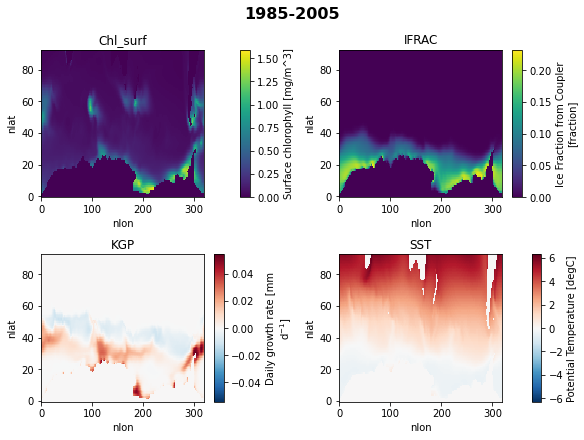

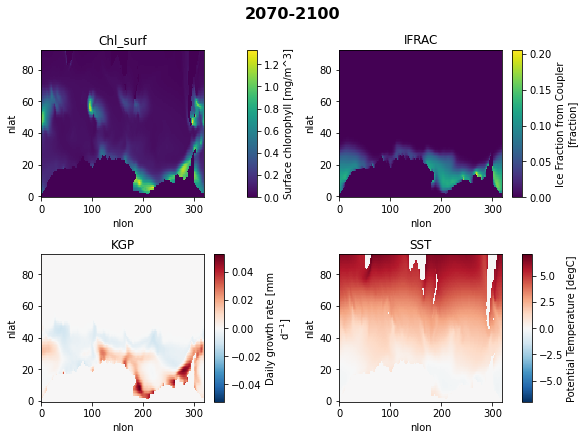

In [7]:
for epoch in ds_djf_epoch.epoch.values:

    nvar = len(ds_djf_epoch.data_vars)
    ncol = int(np.sqrt(nvar))
    nrow = int(nvar/ncol) + min(1, nvar%ncol)

    fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow),
                           constrained_layout=True)

    for i, v in enumerate(ds_djf_epoch.data_vars):
        plt.axes(ax.ravel()[i])

        with xr.set_options(keep_attrs=True):             
            var = ds_djf_epoch[v].sel(epoch=epoch).mean('member_id')
        if 'length' in var.dims:
            var = var.sel(length=40.)            
        var.plot()
        plt.title(v);
    plt.suptitle(epoch, fontsize=16, fontweight='bold');

## Make Polar Plots:
1. fix grid for plotting

In [23]:
dsp = util.pop_add_cyclic(ds_djf_epoch)

NotImplementedError: Item assignment with <class 'tuple'> not supported

## This is the only way I've been able to plot things... 
but there is a gaping hole in the center and I've not consistently been able to fix it

In [27]:
## Create Datafields to plot
kgp_mean = ds_djf_epoch['KGP'].mean('member_id')
sst_mean = ds_djf_epoch['SST'].mean('member_id')
chl_mean = ds_djf_epoch['Chl_surf'].mean('member_id')
ice_mean = ds_djf_epoch['IFRAC'].mean('member_id')

kgp_early = kgp_mean.sel(length='40').sel(epoch='1985-2005')
kgp_late = kgp_mean.sel(length='40').sel(epoch='2070-2100')

sst_early = sst_mean.sel(epoch='1985-2005')
sst_late = sst_mean.sel(epoch='2070-2100')
chl_early = chl_mean.sel(epoch='1985-2005')
chl_late = chl_mean.sel(epoch='2070-2100')
ice_early = ice_mean.sel(epoch='1985-2005')
ice_late = ice_mean.sel(epoch='2070-2100')

# Lat Lon Checks
lon = ds_djf_epoch.TLONG.values
lat = ds_djf_epoch.TLAT.values

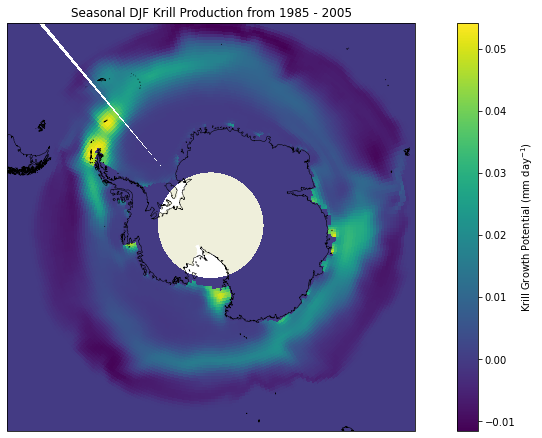

In [35]:
fig = plt.figure(figsize=(15,7.5))
#fig.suptitle('Seasonal DJF Krill Production from 1985 - 2005')#, fontsize=)
#----------Chl
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_title('Seasonal DJF Krill Production from 1985 - 2005')
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.add_feature(cfeature.LAND)

pc=ax.pcolormesh(lon, lat, kgp_early,
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc, ax=ax,label='Krill Growth Potential (mm day$^{-1}$)')
#fig.savefig('Seasonal DJF Climatologies from 30 year epochs CESM-LE: 1985-2005', bbox_inches='tight') #,format='pdf');
